<a href="https://colab.research.google.com/github/AbrahamKong/CMPE257-Clustering_with_GNN_Assignment/blob/main/CMPE_257_Clustering_with_GNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Source
# https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
# Read in Data
df = pd.read_csv("/content/olist_geolocation_dataset.csv")
df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# # Check for null data

# df.isnull().sum()

In [5]:
# discard un-used data and prepare data for K-means clustering
X = df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']).to_numpy()
X

array([[-23.54562128, -46.63929205],
       [-23.54608113, -46.6448203 ],
       [-23.54612897, -46.64295148],
       ...,
       [-28.07185542, -52.01471587],
       [-28.38893188, -51.84687132],
       [-28.07010363, -52.01865773]])

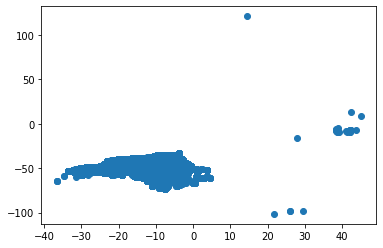

In [6]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], label='True Position')

###K-Means###

In [7]:
# Use Elbow Method to decide which is the best K
# By Eyeballing the data, guess the best K should falls between 2 - 6

inertias = []
for i in range (2, 7):
  k_means = KMeans(n_clusters=i)
  k_means.fit(X)
  inertias.append(k_means.inertia_)

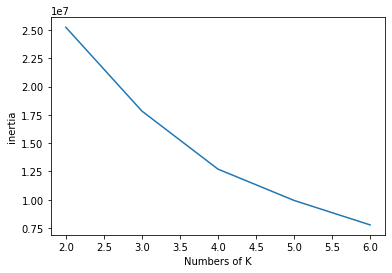

In [8]:
plt.plot([2, 3, 4, 5, 6], inertias, marker='')
plt.xlabel('Numbers of K')
plt.ylabel('inertia')
plt.show()

In [9]:
# Create Clusters
# let K = 4 based on Elbow Method
numOfClusters = 4
kmeans = KMeans(n_clusters = numOfClusters)
kmeans.fit(X)

KMeans(n_clusters=4)

In [10]:
# Explore the clusters
print(kmeans.cluster_centers_)
# print(kmeans.labels_)

[[-22.10498122 -45.76831745]
 [ -9.09683939 -38.67778667]
 [ -8.27975817 -54.18067099]
 [-26.63869646 -51.20683797]]


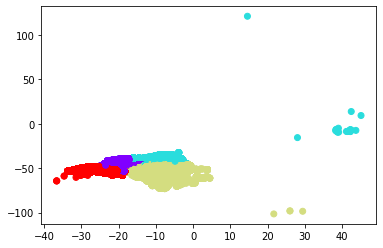

In [11]:
# Visualize K Means with 4 clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="rainbow")

###GMM

In [25]:
from sklearn import mixture

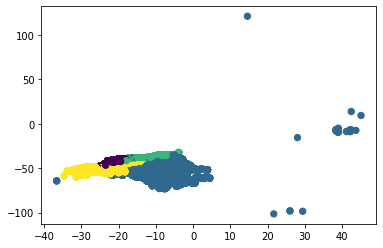

In [26]:
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

###Spectral Clustering

In [12]:
# # Import necessary libraries

# from scipy import linalg as LA

In [13]:
# # Define parameters

# iterationCounter = 0
# variant = 0.3
# initCenroidMethod = "kmeans++"

In [14]:
# def RbfKernel(data1, data2, sigma):
#     delta =np.matrix(abs(np.subtract(data1, data2)))
#     squaredEuclidean = (np.square(delta).sum(axis=1))
#     result = np.exp(-(squaredEuclidean)/(2*sigma**2))
#     return result
    
# def buildSimilarityMatrix(data):
#   nData = data.shape[0]
#   result = np.matrix(np.full((nData, nData), 0, dtype=np.float))
#   for i in range(0, nData):
#     for j in range(0, nData):
#       weight = RbfKernel(data[i, :], data[j, :], variant)
#       result[i, j] = weight
#   return result

# def buildDegreeMatrix(similarityMatrix):
#   diagonal = np.array(similarityMatrix.sum(axis=1)).ravel()
#   result = np.diag(diagonal)
#   return result

# def unnormalizedLaplacian(similarityMatrix, degreeMatrix):
#   return degreeMatrix - similarityMatrix

# def transformToSpectral(laplacianMatrix):
#   global numOfClusters
#   eigen_vals, eigen_vecs = LA.eig(np.matrix(laplacianMatrix))
#   index = eigen_vals.real.argsort()[:k]
#   result = np.ndarray(shape=(laplacianMatrix.shape[0], 0))
#   for i in range (1, index.shape[0]):
#     cor_eigen_vec = np.transpose(np.matrix(eigen_vecs[:, np.asscalar(index[i])]))
#     result = np.concatenate((result, cor_eigen_vec), axis = 1)
#   return result

In [15]:
# simMat = buildSimilarityMatrix(X)
# degMat = buildDegreeMatrix(simMat)
# lapMat = unnormalizedLaplacian(simMat, degMat)
# transformedData = transformToSpectral(lapMat)

In [16]:
# # Import necessary libraries

# from scipy.spatial import distance

In [17]:
# rbf_param = 7.6

# K = np.exp(-rbf_param * distance.cdist(X, X, metrix='sqeuclidean'))

In [18]:
# D = K.sum(axis=1)
# D = np.sqrt(1/D)
# M = np.multiply(D[ np.newaxis, :], np.multiply(K, D[:, np.newaxis]))

###Agglomerative Clustering

In [19]:
# # Import necessary libraries

# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import AgglomerativeClustering

In [20]:
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [21]:
# # Import necessary libraries

# import scipy
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
# from scipy.spatial.distance import pdist 

# import sklearn
# from sklearn.cluster import AgglomerativeClustering
# import sklearn.metrics as sm

In [22]:
# Z = linkage(X[0], 'ward')

ValueError: ignored

###Reference

[2.3. Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
